In [62]:
print("hello")

hello


In [63]:
import pandas as pd
import numpy as np

In [64]:
car = pd.read_csv("I:/ML Projects/Car-Price-Predictor-ML-Project/model_training/car_data.csv")

In [65]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [66]:
car.shape

(892, 6)

In [67]:
car.info()

<class 'pandas.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   name        892 non-null    str  
 1   company     892 non-null    str  
 2   year        892 non-null    str  
 3   Price       892 non-null    str  
 4   kms_driven  840 non-null    str  
 5   fuel_type   837 non-null    str  
dtypes: str(6)
memory usage: 41.9 KB


In [68]:
car.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [69]:
car['year'].unique()

<StringArray>
['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016', '2010',
 '2017', '2008', '2011', '2019', '2009', '2005', '2000',  '...', '150k',
 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs', 'sale', '1995', 'ara)',
 '2002', 'SELL', '2001', 'tion', 'odel', '2 bs', 'arry',  'Eon', 'o...',
 'ture',  'emi',  'car', 'able',  'no.', 'd...', 'SALE', 'digo', 'sell',
 'd Ex', 'n...', 'e...', 'D...', ', Ac', 'go .', 'k...', 'o c4', 'zire',
 'cent', 'Sumo',  'cab', 't xe',  'EV2', 'r...', 'zest']
Length: 61, dtype: str

In [70]:
car['Price'].unique()

<StringArray>
[       '80,000',      '4,25,000', 'Ask For Price',      '3,25,000',
      '5,75,000',      '1,75,000',      '1,90,000',      '8,30,000',
      '2,50,000',      '1,82,000',
 ...
        '42,000',      '1,89,000',      '1,62,000',        '35,999',
     '29,00,000',        '39,999',        '50,500',      '5,10,000',
      '8,60,000',      '5,00,001']
Length: 274, dtype: str

In [71]:
car.kms_driven.unique()

<StringArray>
[  '45,000 kms',       '40 kms',   '22,000 kms',   '28,000 kms',
   '36,000 kms',   '59,000 kms',   '41,000 kms',   '25,000 kms',
   '24,530 kms',   '60,000 kms',
 ...
   '60,123 kms',   '38,900 kms', '1,37,495 kms',   '91,200 kms',
 '1,46,000 kms', '1,00,800 kms',    '2,100 kms',    '2,500 kms',
 '1,32,000 kms',       'Petrol']
Length: 259, dtype: str

In [72]:
car.fuel_type.unique()

<StringArray>
['Petrol', 'Diesel', nan, 'LPG']
Length: 4, dtype: str

# Data Quality

- year has many non-year values
- year object to int
- price has 'Ask for price'
- price object to int
- kms_driven has 'kms' with integers
- kms_driven object to int
- kms_driven has nan values
- fuel_type has nan values
- keep first 3 words of name

# 1. Data Cleaning

In [73]:
backup= car.copy()

In [74]:
backup.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


### Solve -> year has many non-year values

In [75]:
car.year.head()

0    2007
1    2006
2    2018
3    2014
4    2014
Name: year, dtype: str

In [76]:
car.year.str.isnumeric().sample(10)

496    True
610    True
124    True
93     True
706    True
285    True
271    True
340    True
783    True
816    True
Name: year, dtype: bool

In [77]:
car[car.year.str.isnumeric()].sample(10)

,name,company,year,Price,kms_driven,fuel_type
558,Chevrolet Cruze LTZ AT,Chevrolet,2014,"4,00,000","41,000 kms",Diesel
340,Mahindra Scorpio VLX 4WD Airbag,Mahindra,2013,"6,10,000","35,000 kms",Diesel
891,Chevrolet Sail 1.2 LT ABS,Chevrolet,2014,"1,60,000",Petrol,NaN
592,Tata Indigo Marina LS,Tata,2004,"1,80,000","70,000 kms",Diesel
348,Hyundai i20,Hyundai,2014,"4,49,999","23,000 kms",Petrol
664,Hyundai i20 Magna,Hyundai,2011,"2,40,000","42,000 kms",Petrol
690,Maruti Suzuki Ertiga Vxi,Maruti,2012,"10,00,000","2,00,000 kms",Diesel
629,Maruti Suzuki Swift Dzire VXi 1.2 BS IV,Maruti,2011,"2,55,000","64,000 kms",Petrol
200,Maruti Suzuki Wagon R LXI BS IV,Maruti,2011,"2,10,000","35,000 kms",Petrol
435,Chevrolet Beat LS Diesel,Chevrolet,2016,"2,10,000","22,000 kms",Diesel


In [78]:
car = car[car.year.str.isnumeric()]

In [79]:
car.sample(10)

,name,company,year,Price,kms_driven,fuel_type
487,Maruti Suzuki Ertiga Vxi,Maruti,2015,"5,50,000","75,000 kms",Petrol
682,Maruti Suzuki Swift Dzire Tour VDi,Maruti,2017,"6,50,000","41,800 kms",Diesel
586,Mahindra XUV500 W6,Mahindra,2013,"5,49,900","52,800 kms",Diesel
548,Hyundai Getz Prime 1.3 GLX,Hyundai,2009,"1,15,000","20,000 kms",Petrol
415,Maruti Suzuki Alto K10 VXi,Maruti,2014,"2,70,000","22,000 kms",Petrol
872,Chevrolet Tavera Neo,Chevrolet,2007,"4,65,000","1,00,800 kms",Diesel
202,Maruti Suzuki Alto Std BS IV,Maruti,2013,"1,25,000","39,000 kms",Petrol
326,Maruti Suzuki Wagon R,Maruti,2016,"3,44,999","15,000 kms",Petrol
54,Maruti Suzuki Wagon R VXi BS III,Maruti,2013,"1,05,000","39,000 kms",Petrol
165,Chevrolet Beat LT Opt Diesel,Chevrolet,2011,"1,50,000","40,000 kms",Diesel


### Solve -> year object to int

In [80]:
car['year']=car.year.astype(int)

In [81]:
car['year'].info()

<class 'pandas.Series'>
Index: 842 entries, 0 to 891
Series name: year
Non-Null Count  Dtype
--------------  -----
842 non-null    int64
dtypes: int64(1)
memory usage: 13.2 KB


### Solve -> price has 'Ask for price', we need only int values

In [82]:
car=car[car['Price'] != "Ask For Price"]

In [83]:
car['Price'].sample(20)

161    1,59,500
784    2,50,000
579    3,50,000
262    5,69,999
333    5,49,999
642    2,80,000
703    1,80,000
598      32,000
771      60,000
659    1,25,000
271    4,89,999
402      65,000
745    4,24,999
381    3,85,000
310    2,99,999
852    4,75,000
128    2,00,000
507      99,000
436    4,95,000
753      85,000
Name: Price, dtype: str

### Solve -> price object to int and Remobe Coma

coma remove

In [84]:
car['Price'].str.replace(',','').sample(15)

474     300000
15      425000
549     215000
372     120000
453     130000
761     430000
308     520000
222     385000
447    1499000
241     284999
539     130000
299     150000
86     1200000
464     419000
400     450000
Name: Price, dtype: str

coma remove, type change into int and store in car dataset

In [85]:
car['Price']=car['Price'].str.replace(',','').astype(int)

In [86]:
car.Price.info()

<class 'pandas.Series'>
Index: 819 entries, 0 to 891
Series name: Price
Non-Null Count  Dtype
--------------  -----
819 non-null    int64
dtypes: int64(1)
memory usage: 12.8 KB


In [87]:
car.info()

<class 'pandas.DataFrame'>
Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   name        819 non-null    str  
 1   company     819 non-null    str  
 2   year        819 non-null    int64
 3   Price       819 non-null    int64
 4   kms_driven  819 non-null    str  
 5   fuel_type   816 non-null    str  
dtypes: int64(2), str(4)
memory usage: 44.8 KB


### Solve -> kms_driven has 'kms' with integers

In [88]:
car['kms_driven'].sample(5)

873    1,50,000 kms
290      32,700 kms
852      60,123 kms
862    1,00,000 kms
718      85,960 kms
Name: kms_driven, dtype: str

split based on space

In [89]:
car['kms_driven']=car['kms_driven'].str.split(' ')

In [90]:
car.kms_driven.sample(8)

738         [0, kms]
685    [58,000, kms]
646    [74,000, kms]
13     [48,660, kms]
865    [55,000, kms]
380    [42,000, kms]
279    [49,000, kms]
575    [37,518, kms]
Name: kms_driven, dtype: object

we take first value of this column that means 0 number index

In [91]:
car['kms_driven']=car['kms_driven'].str.get(0)

In [92]:
car['kms_driven'].sample(7)

514      25,000
463       3,000
465      50,000
641      48,006
638      90,001
711       1,000
590    1,04,000
Name: kms_driven, dtype: object

Now remove coma (,) from this integer number

In [93]:
car['kms_driven'] = car['kms_driven'].str.replace(',','')

In [94]:
car['kms_driven'].sample(7)

888    27000
358    34000
277    10000
457    28000
383    62000
551    35000
419    35000
Name: kms_driven, dtype: object

but here has some problem, some values stile have string, called 'Petrol' or something. we have to remove it

In [95]:
car['kms_driven'].tail()

886    132000
888     27000
889     40000
890    Petrol
891    Petrol
Name: kms_driven, dtype: object

In [96]:
car=car[car['kms_driven'].str.isnumeric()]

In [97]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


now convert into integer

In [98]:
car['kms_driven'] = car['kms_driven'].astype(int)

In [99]:
car.info()

<class 'pandas.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   name        817 non-null    str  
 1   company     817 non-null    str  
 2   year        817 non-null    int64
 3   Price       817 non-null    int64
 4   kms_driven  817 non-null    int64
 5   fuel_type   816 non-null    str  
dtypes: int64(3), str(3)
memory usage: 44.7 KB


### Solve -> fuel_type has nan values

In [100]:
car['fuel_type'].isna().sum()

np.int64(1)

In [101]:
car[car['fuel_type'].isna()]

,name,company,year,Price,kms_driven,fuel_type
132,Toyota Corolla,Toyota,2009,275000,26000,NaN


In [102]:
car[~car['fuel_type'].isna()].sample(7) # ~ it means, excluding this NaN rows i need all

,name,company,year,Price,kms_driven,fuel_type
580,Jeep Wrangler Unlimited 4x4 Diesel,Jeep,2015,950000,3528,Diesel
532,Hyundai Eon D Lite Plus,Hyundai,2018,260000,25000,Petrol
107,Maruti Suzuki Ertiga Vxi,Maruti,2016,575000,29000,Petrol
509,Tata Nano Lx BSIV,Tata,2010,52000,9000,Petrol
789,Maruti Suzuki Swift VDi,Maruti,2009,120000,90000,Diesel
594,Hyundai Xcent SX 1.2,Hyundai,2015,400000,43000,Diesel
598,Tata Nano LX Special Edition,Tata,2010,32000,48008,Petrol


In [103]:
car=car[~car['fuel_type'].isna()]

In [104]:
car['fuel_type'].iloc[137]

'Diesel'

In [105]:
car.sample(7)

,name,company,year,Price,kms_driven,fuel_type
508,Renault Kwid RXT,Renault,2019,370000,1000,Petrol
261,Maruti Suzuki Eeco 5 STR WITH AC HTR,Maruti,2015,251111,55000,Petrol
453,Mahindra Logan Diesel 1.5 DLS,Mahindra,2009,130000,66000,Petrol
564,Maruti Suzuki Alto K10 LXi CNG,Maruti,2014,199000,37000,Petrol
743,Tata Indica V2 DLS BS III,Tata,2009,90000,30600,Diesel
866,Tata Zest XE 75 PS Diesel,Tata,2017,290000,120000,Diesel
708,Maruti Suzuki Zen LX BSII,Maruti,2004,70000,100000,Petrol


### Solve -> keep first 3 words of name

In [106]:
car['name']=car['name'].str.split(' ')

In [107]:
car['name'].head()

0      [Hyundai, Santro, Xing, XO, eRLX, Euro, III]
1                      [Mahindra, Jeep, CL550, MDI]
3    [Hyundai, Grand, i10, Magna, 1.2, Kappa, VTVT]
4            [Ford, EcoSport, Titanium, 1.5L, TDCi]
6                                      [Ford, Figo]
Name: name, dtype: object

In [108]:
car['name'] = car['name'].str.slice(0,3)

In [109]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,"[Hyundai, Santro, Xing]",Hyundai,2007,80000,45000,Petrol
1,"[Mahindra, Jeep, CL550]",Mahindra,2006,425000,40,Diesel
3,"[Hyundai, Grand, i10]",Hyundai,2014,325000,28000,Petrol
4,"[Ford, EcoSport, Titanium]",Ford,2014,575000,36000,Diesel
6,"[Ford, Figo]",Ford,2012,175000,41000,Diesel


In [110]:
car['name'] = car['name'].str.join(' ')

In [111]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


#### here our index change, so now we reset our index

In [112]:
car=car.reset_index()

In [113]:
car.head()

,index,name,company,year,Price,kms_driven,fuel_type
0,0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,6,Ford Figo,Ford,2012,175000,41000,Diesel


now drop previous index

In [114]:
car.drop(columns=['index'], inplace=True)

In [115]:
car=car.reset_index(drop=True)

In [116]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


In [117]:
car.info()

<class 'pandas.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    str   
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    str   
dtypes: int64(3), object(1), str(2)
memory usage: 38.4+ KB


In [118]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


# 2. EDA and Data Pre-Processing

In [119]:
car[car['Price']>500000].count()

name          188
company       188
year          188
Price         188
kms_driven    188
fuel_type     188
dtype: int64

In [120]:
(car['Price'] > 2000000).sum()


np.int64(7)

In [121]:
car[car['Price']>700000].count()

name          95
company       95
year          95
Price         95
kms_driven    95
fuel_type     95
dtype: int64

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

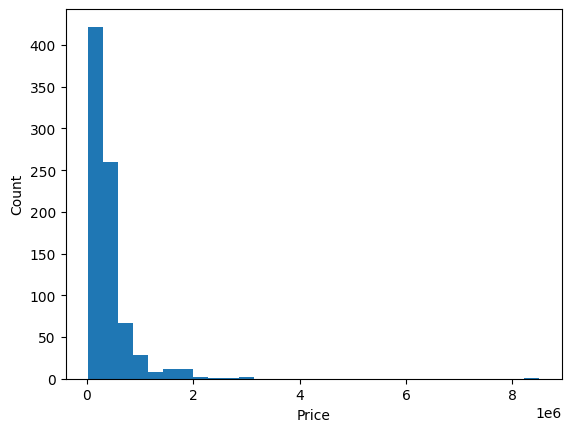

In [123]:
plt.hist(car['Price'], bins=30)
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

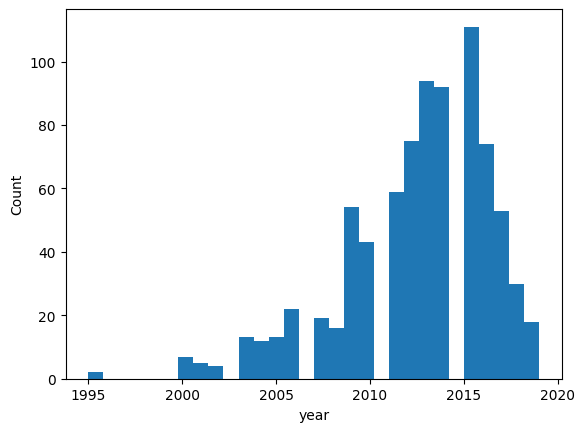

In [124]:
plt.hist(car['year'], bins=30)
plt.xlabel('year')
plt.ylabel('Count')
plt.show()

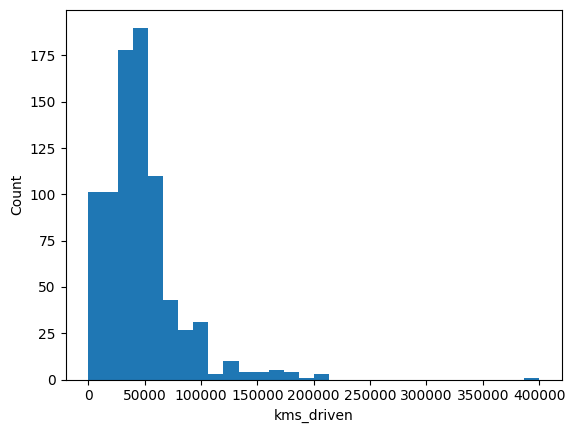

In [125]:
plt.hist(car['kms_driven'], bins=30)
plt.xlabel('kms_driven')
plt.ylabel('Count')
plt.show()

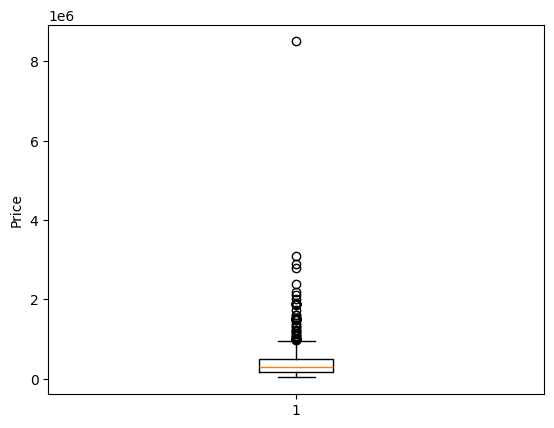

In [126]:
plt.boxplot(car['Price'])
plt.ylabel('Price')
plt.show()

In [127]:
Q1 = car['Price'].quantile(0.25)
Q3 = car['Price'].quantile(0.75)
IQR = Q3 - Q1


In [128]:
outliers = car[
    (car['Price'] < Q1 - 1.5 * IQR) |
    (car['Price'] > Q3 + 1.5 * IQR)
]


In [129]:
outliers.shape[0]


53

In [130]:
car['Price'].max()


np.int64(8500003)

In [131]:
car[car['Price'] == car['Price'].max()]


,name,company,year,Price,kms_driven,fuel_type
534,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [132]:
car = car[car['Price'] != car['Price'].max()]

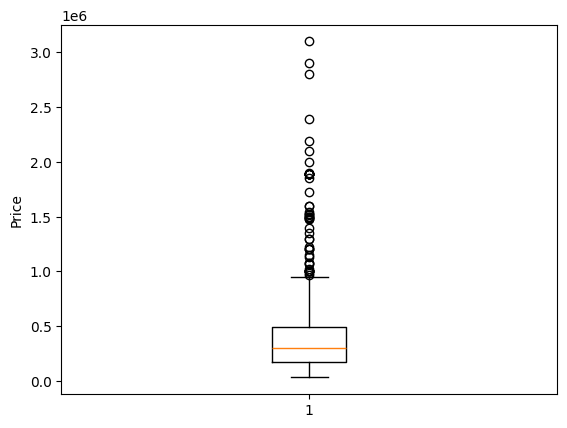

In [133]:
plt.boxplot(car['Price'])
plt.ylabel('Price')
plt.show()

In [134]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


In [135]:
car.to_csv('car_clean_data.csv')

# Modeling

In [136]:
X=car.drop(columns='Price')

In [137]:
Y=car['Price']

In [138]:
X.head()

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel


In [139]:
Y.head()

0     80000
1    425000
2    325000
3    575000
4    175000
Name: Price, dtype: int64

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [141]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(652, 5)
(163, 5)
(652,)
(163,)


In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

In [143]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

,"categories categories: 'auto' or a list of array-like, default='auto'Categories (unique values) per feature:- 'auto' : Determine categories automatically from the training data.- list : ``categories[i]`` holds the categories expected in the ith column. The passed categories should not mix strings and numeric values within a single feature, and should be sorted in case of numeric values.The used categories can be found in the ``categories_`` attribute... versionadded:: 0.20",'auto'
,"drop drop: {'first', 'if_binary'} or an array-like of shape (n_features,), default=NoneSpecifies a methodology to use to drop one of the categories perfeature. This is useful in situations where perfectly collinearfeatures cause problems, such as when feeding the resulting datainto an unregularized linear regression model.However, dropping one category breaks the symmetry of the originalrepresentation and can therefore induce a bias in downstream models,for instance for penalized linear classification or regression models.- None : retain all features (the default).- 'first' : drop the first category in each feature. If only one category is present, the feature will be dropped entirely.- 'if_binary' : drop the first category in each feature with two categories. Features with 1 or more than 2 categories are left intact.- array : ``drop[i]`` is the category in feature ``X[:, i]`` that should be dropped.When `max_categories` or `min_frequency` is configured to groupinfrequent categories, the dropping behavior is handled after thegrouping... versionadded:: 0.21 The parameter `drop` was added in 0.21... versionchanged:: 0.23 The option `drop='if_binary'` was added in 0.23... versionchanged:: 1.1 Support for dropping infrequent categories.",None
,"sparse_output sparse_output: bool, default=TrueWhen ``True``, it returns a :class:`scipy.sparse.csr_matrix`,i.e. a sparse matrix in ""Compressed Sparse Row"" (CSR) format... versionadded:: 1.2 `sparse` was renamed to `sparse_output`",True
,"dtype dtype: number type, default=np.float64Desired dtype of output.",<class 'numpy.float64'>
,"handle_unknown handle_unknown: {'error', 'ignore', 'infrequent_if_exist', 'warn'}, default='error'Specifies the way unknown categories are handled during :meth:`transform`.- 'error' : Raise an error if an unknown category is present during transform.- 'ignore' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will be all zeros. In the inverse transform, an unknown category will be denoted as None.- 'infrequent_if_exist' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will map to the infrequent category if it exists. The infrequent category will be mapped to the last position in the encoding. During inverse transform, an unknown category will be mapped to the category denoted `'infrequent'` if it exists. If the `'infrequent'` category does not exist, then :meth:`transform` and :meth:`inverse_transform` will handle an unknown category as with `handle_unknown='ignore'`. Infrequent categories exist based on `min_frequency` and `max_categories`. Read more in the :ref:`User Guide `.- 'warn' : When an unknown category is encountered during transform a warning is issued, and the encoding then proceeds as described for `handle_unknown=""infrequent_if_exist""`... versionchanged:: 1.1 `'infrequent_if_exist'` was added to automatically handle unknown categories and infrequent categories... versionadded:: 1.6 The option `""warn""` was added in 1.6.",'error'
,"min_frequency min_frequency: int or float, default=NoneSpecifies the minimum frequency below which a category will beconsidered infrequent.- If `int`, categories with a smaller cardinality will be considered infrequent.- If `float`, categories with a smaller cardinality than `min_frequency * n_samples` will be considered infrequent... versionadded:: 1.1 Read more in the :ref:`User Guide `.",None
,"max_catego

In [144]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [145]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

,"categories categories: 'auto' or a list of array-like, default='auto'Categories (unique values) per feature:- 'auto' : Determine categories automatically from the training data.- list : ``categories[i]`` holds the categories expected in the ith column. The passed categories should not mix strings and numeric values within a single feature, and should be sorted in case of numeric values.The used categories can be found in the ``categories_`` attribute... versionadded:: 0.20",'auto'
,"drop drop: {'first', 'if_binary'} or an array-like of shape (n_features,), default=NoneSpecifies a methodology to use to drop one of the categories perfeature. This is useful in situations where perfectly collinearfeatures cause problems, such as when feeding the resulting datainto an unregularized linear regression model.However, dropping one category breaks the symmetry of the originalrepresentation and can therefore induce a bias in downstream models,for instance for penalized linear classification or regression models.- None : retain all features (the default).- 'first' : drop the first category in each feature. If only one category is present, the feature will be dropped entirely.- 'if_binary' : drop the first category in each feature with two categories. Features with 1 or more than 2 categories are left intact.- array : ``drop[i]`` is the category in feature ``X[:, i]`` that should be dropped.When `max_categories` or `min_frequency` is configured to groupinfrequent categories, the dropping behavior is handled after thegrouping... versionadded:: 0.21 The parameter `drop` was added in 0.21... versionchanged:: 0.23 The option `drop='if_binary'` was added in 0.23... versionchanged:: 1.1 Support for dropping infrequent categories.",None
,"sparse_output sparse_output: bool, default=TrueWhen ``True``, it returns a :class:`scipy.sparse.csr_matrix`,i.e. a sparse matrix in ""Compressed Sparse Row"" (CSR) format... versionadded:: 1.2 `sparse` was renamed to `sparse_output`",True
,"dtype dtype: number type, default=np.float64Desired dtype of output.",<class 'numpy.float64'>
,"handle_unknown handle_unknown: {'error', 'ignore', 'infrequent_if_exist', 'warn'}, default='error'Specifies the way unknown categories are handled during :meth:`transform`.- 'error' : Raise an error if an unknown category is present during transform.- 'ignore' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will be all zeros. In the inverse transform, an unknown category will be denoted as None.- 'infrequent_if_exist' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will map to the infrequent category if it exists. The infrequent category will be mapped to the last position in the encoding. During inverse transform, an unknown category will be mapped to the category denoted `'infrequent'` if it exists. If the `'infrequent'` category does not exist, then :meth:`transform` and :meth:`inverse_transform` will handle an unknown category as with `handle_unknown='ignore'`. Infrequent categories exist based on `min_frequency` and `max_categories`. Read more in the :ref:`User Guide `.- 'warn' : When an unknown category is encountered during transform a warning is issued, and the encoding then proceeds as described for `handle_unknown=""infrequent_if_exist""`... versionchanged:: 1.1 `'infrequent_if_exist'` was added to automatically handle unknown categories and infrequent categories... versionadded:: 1.6 The option `""warn""` was added in 1.6.",'error'
,"min_frequency min_frequency: int or float, default=NoneSpecifies the minimum frequency below which a category will beconsidered infrequent.- If `int`, categories with a smaller cardinality will be considered infrequent.- If `float`, categories with a smaller cardinality than `min_frequency * n_samples` will be considered infrequent... versionadded:: 1.1 Read more in the :ref:`User Guide `.",None
,"max_catego

In [146]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),remainder='passthrough')

In [147]:
lr = LinearRegression()

In [148]:
pipe = make_pipeline(column_trans,lr)

In [149]:
pipe.fit(X_train,y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...), ('linearregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('onehotencoder', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the differ

In [150]:
y_pred=pipe.predict(X_test)

In [151]:
r2_score(y_test,y_pred)

0.7209478710157564

In [152]:
scores=[]
for i in range (1000):
    X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [153]:
np.argmax(scores)

np.int64(433)

In [154]:
scores[np.argmax(scores)]

0.8457059012561223

In [155]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8457059012561223

In [156]:
import pickle

In [157]:
pickle.dump(pipe,open('linearregressionmodel.pkl','wb'))

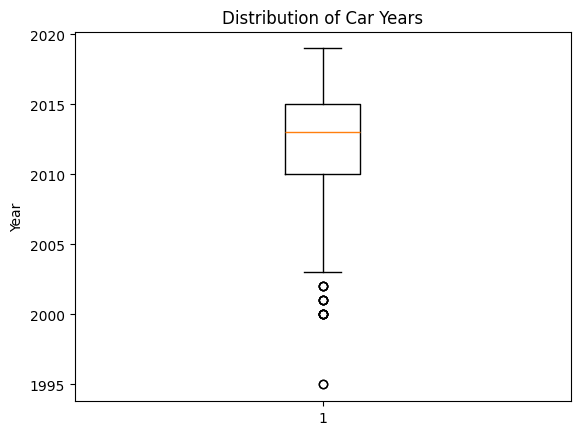

In [159]:
plt.boxplot(car['year'].dropna())
plt.title('Distribution of Car Years')
plt.ylabel('Year')
plt.show()

## Model performance not satisfied, i Linear Regression is need to use with use np.log, thats why negative value do not come again, but logically/mathmatically this is not right

In [160]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import pickle

X = car.drop(columns='Price')
Y = np.log1p(car['Price'])

ohe = OneHotEncoder(handle_unknown='ignore')

column_trans = make_column_transformer(
    (ohe, ['name','company','fuel_type']),
    remainder='passthrough'
)

scores = []

for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.2, random_state=i
    )
    lr = LinearRegression()
    pipe = make_pipeline(column_trans, lr)
    pipe.fit(X_train, y_train)
    scores.append(r2_score(y_test, pipe.predict(X_test)))

best_seed = np.argmax(scores)

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=best_seed
)

final_pipe = make_pipeline(column_trans, LinearRegression())
final_pipe.fit(X_train, y_train)

pickle.dump(
    final_pipe,
    open('../log_linearregressionmodel.pkl', 'wb')
)


# Here my Linear Regression Model sometime predict negative values, so now try another model

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [162]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

ohe = OneHotEncoder(handle_unknown='ignore')

column_trans = make_column_transformer(
    (ohe, ['name', 'company', 'fuel_type']),
    remainder='passthrough'
)

rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf_pipe = make_pipeline(column_trans, rf)
rf_pipe.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...), ('randomforestregressor', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('onehotencoder', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the d

In [163]:
rf_pred = rf_pipe.predict(X_test)
r2_score(y_test, rf_pred)


0.70013765305678

In [164]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gbr_pipe = make_pipeline(column_trans, gbr)
gbr_pipe.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...), ('gradientboostingregressor', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('onehotencoder', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of t

In [165]:
gbr_pred = gbr_pipe.predict(X_test)
r2_score(y_test, gbr_pred)


0.7041740658426026